# K-Nearest Neighbors

In [54]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [55]:
df = pd.read_csv("/workspaces/all_in_one/team1proj/StellarDatasetML/data/stellar_eda.csv")

## Creating Train Test Split

In [56]:
#List of all numarical columns that are going to be used in our modelling process
column_list = ['u','g','r','i','z','redshift', 'alpha', 'delta', 'MJD']
#defning the input and the output
X = df[column_list]
y = df["class"]

In [57]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

## Fitting a KNN model

In [58]:
def accuracy(y_test, y_preds):
  
    total_correct = 0
    for i in range(len(y_test)):
        if int(y_test[i]) == int(y_preds[i]):
            total_correct += 1
    acc = total_correct/len(y_test)
    return acc

In [59]:
# Center and scale (i.e., standardize) all numeric features
# Z-score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create KNN model object
knn = KNeighborsClassifier(n_neighbors=5)

# Train Knn Classifer
knn = knn.fit(X_train,y_train)

In [60]:
# define loss function
loss = 'accuracy'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(knn, X_train_std, y_train, cv=kfold, scoring=loss)


np.round(results, 3)

array([0.935, 0.941, 0.943, 0.942, 0.94 ])

## Tuning

In [61]:
# create KNN model object
knn = KNeighborsClassifier()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(1, 100, 5)}


In [62]:
# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train_std, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

0.9361238838289134

In [63]:
# Best model's k value
optimal_k = results.best_estimator_.get_params().get('n_neighbors')
optimal_k

6

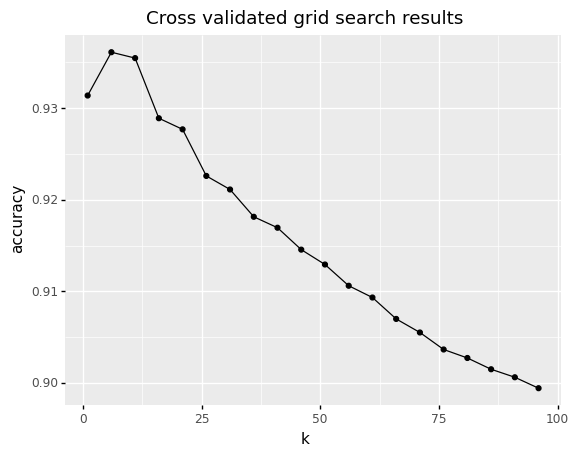

<ggplot: (8785404692270)>

In [64]:
# Plot all RMSE results
all_errors = pd.DataFrame({
  'k': range(1, 100, 5),
  'accuracy': results.cv_results_['mean_test_score']
  })

(ggplot(all_errors, aes(x='k', y='accuracy'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Model performance

In [65]:
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best_fit = knn_best.fit(X_train_std, y_train)

predictions = knn_best_fit.predict(X_train_std)
cm = confusion_matrix(y_train, predictions)
cm

array([[32481,   216,   556],
       [  860,  9683,    84],
       [ 1036,     2, 11081]])

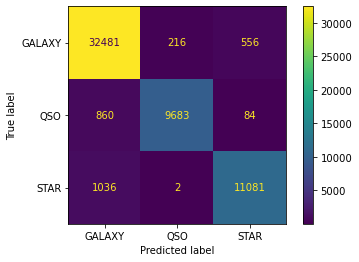

In [66]:
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=knn_best_fit.classes_
  )
  
disp.plot()

In [67]:
#Confusion Matrix of the X_test y_test

predictions =  knn_best_fit.predict(X_test)
cm1 = confusion_matrix(y_test, predictions)
cm1

array([[13835,   127,   341],
       [  419,  4084,    39],
       [  534,     1,  4620]])

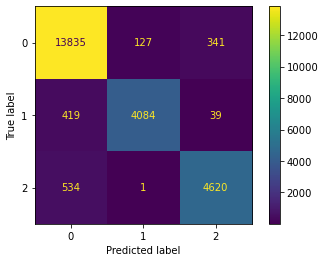

In [68]:
#Confusion Matrix of the X_test y_test Visualized
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm1,
  )
  
disp.plot()

In [69]:

#Predict the response for test dataset
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9440833333333334


In [71]:
print(metrics.classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.95     14303
         QSO       0.97      0.91      0.94      4542
        STAR       0.92      0.92      0.92      5155

    accuracy                           0.94     24000
   macro avg       0.94      0.93      0.94     24000
weighted avg       0.94      0.94      0.94     24000

